<a href="https://colab.research.google.com/github/bhaskoro-muthohar/DataScienceLearning/blob/master/Analyzing_why_people_quit_ther_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytic Exercise (Analyzing why people quit ther job!)

##**Getting the data**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df = pd.read_csv('https://raw.githubusercontent.com/bhaskoro-muthohar/DataScienceLearning/master/HR_comma_sep.csv')

##Viewing the data

In [2]:
print('This is Head')
print(df.head())

print('This is Tail')
print(df.tail())

This is Head
   satisfaction_level  last_evaluation  ...  sales  salary
0                0.38             0.53  ...  sales     low
1                0.80             0.86  ...  sales  medium
2                0.11             0.88  ...  sales  medium
3                0.72             0.87  ...  sales     low
4                0.37             0.52  ...  sales     low

[5 rows x 10 columns]
This is Tail
       satisfaction_level  last_evaluation  ...    sales  salary
14994                0.40             0.57  ...  support     low
14995                0.37             0.48  ...  support     low
14996                0.37             0.53  ...  support     low
14997                0.11             0.96  ...  support     low
14998                0.37             0.52  ...  support     low

[5 rows x 10 columns]


In [3]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
# Describing the dataset (non numerical values)
df.describe(include=['object'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


**Data is very clean!**

##Data Exploration

###Profile leaving employees

In [0]:
# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 3
matplotlib.rcParams['figure.dpi'] = 200

In [7]:
# Getting data of employees that leave and do not leave
leftdf = df[df['left']==1]
notleftdf =df[df['left']==0]

# Getting the shapes and numbers of these people
print("shape of leftdf ",leftdf.shape)
print("shape of notleftdf ",notleftdf.shape)

shape of leftdf  (3571, 10)
shape of notleftdf  (11428, 10)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


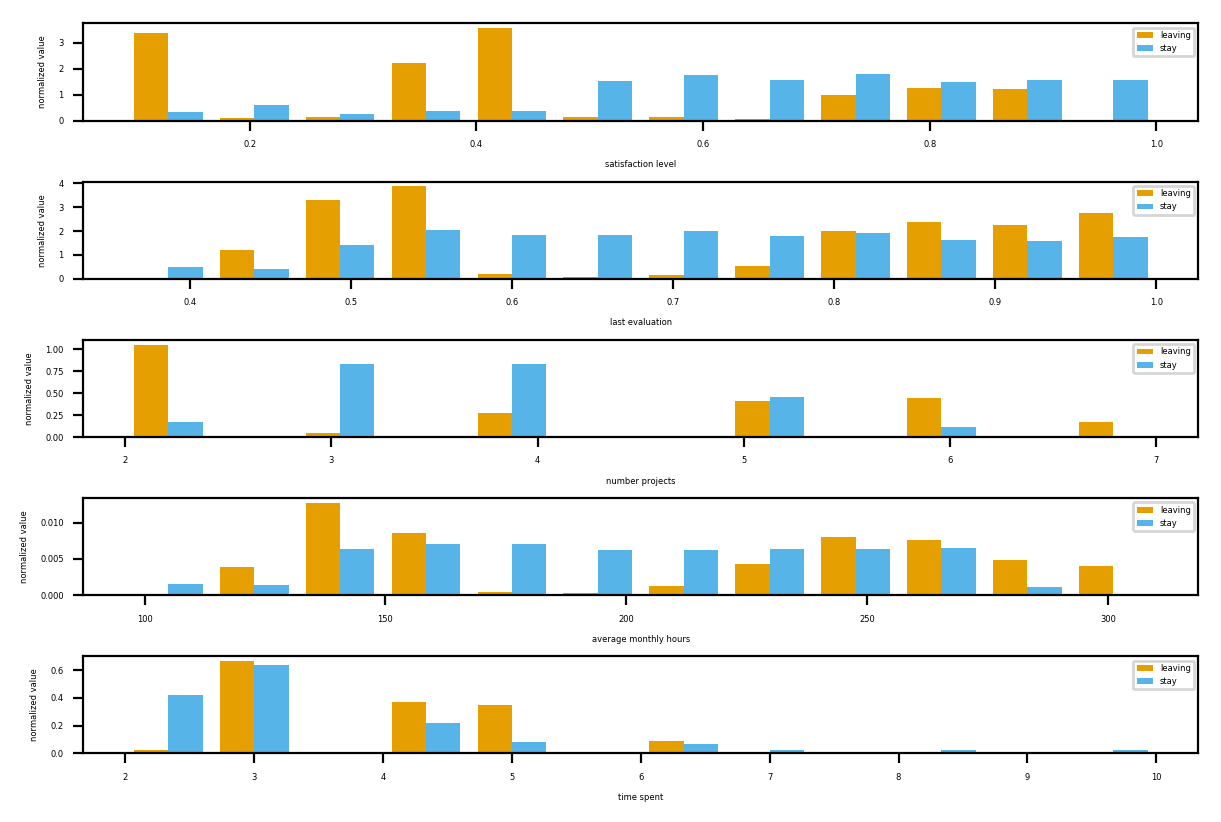

In [8]:
#make seperated list for satisfaction level
x1 = list(leftdf['satisfaction_level'])
x2 = list(notleftdf['satisfaction_level'])

#make seperated list for last evaluation
x3 = list(leftdf['last_evaluation'])
x4 = list(notleftdf['last_evaluation'])

#make seperated list for number project
x5 = list(leftdf['number_project'])
x6 = list(notleftdf['number_project'])

#make seperated list for average monthly hours
x7 = list(leftdf['average_montly_hours'])
x8 = list(notleftdf['average_montly_hours'])

#make seperated list for time spent company
x9 = list(leftdf['time_spend_company'])
x10 = list(notleftdf['time_spend_company'])


#assign color and names
colors = ['#E69F00', '#56B4E9']
names = ['leaving', 'stay']

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(511)
plt.hist([x1,x2], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('satisfaction level')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(512)
plt.hist([x3,x4], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('last evaluation')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(513)
plt.hist([x5,x6], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('number projects')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(514)
plt.hist([x7,x8], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('average monthly hours')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(515)
plt.hist([x9,x10], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('time spent')
plt.ylabel('normalized value')

plt.subplots_adjust(top=11 ,bottom=10)
plt.tight_layout()
plt.show()

(-1.1060820857793268,
 1.100289623132349,
 -1.1055168914319171,
 1.1045630501523822)

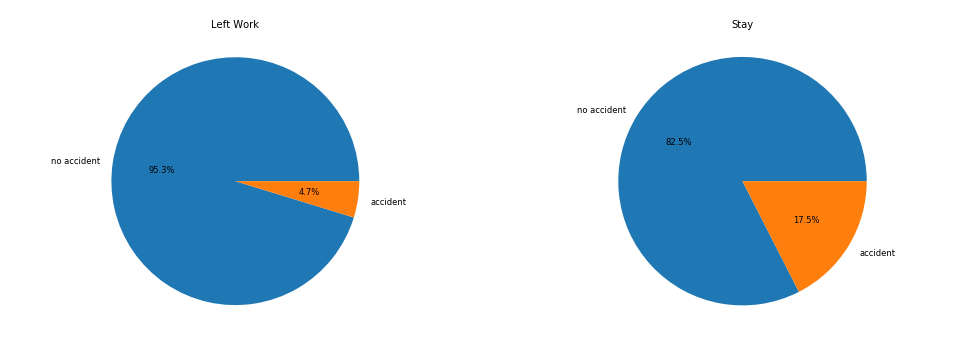

In [9]:
# Do the value counts of work accident
leftworkaccidentcounts = leftdf['Work_accident'].value_counts()
notleftworkaccidentcounts = notleftdf['Work_accident'].value_counts()

# plot each pie chart in a separate subplot
plt.subplot(221)
plt.pie(leftworkaccidentcounts, labels=('no accident', 'accident'),autopct='%1.1f%%');
plt.title('Left Work')
plt.axis('equal') 

# plot each pie chart in a separate subplot
plt.subplot(222)
plt.pie(notleftworkaccidentcounts, labels=('no accident', 'accident'),autopct='%1.1f%%');
plt.title('Stay')
plt.axis('equal')

(-1.1074898558809072,
 1.1003566598038528,
 -1.1087614315615755,
 1.1050481243177366)

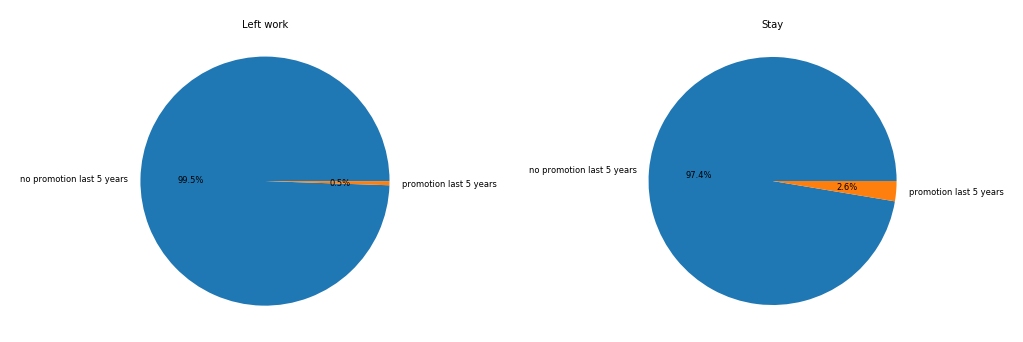

In [10]:
# Do the value counts of promotion counts
leftpromotioncounts = leftdf['promotion_last_5years'].value_counts()
noleftpromotioncounts = notleftdf['promotion_last_5years'].value_counts()

# plot each pie chart in a separate subplot
plt.subplot(221)
plt.pie(leftpromotioncounts, labels=('no promotion last 5 years', 'promotion last 5 years'), autopct='%1.1f%%')
plt.title('Left work')
plt.axis('equal')

# plot each pie chart in a separate subplot
plt.subplot(222)
plt.pie(noleftpromotioncounts, labels=('no promotion last 5 years', 'promotion last 5 years'), autopct='%1.1f%%')
plt.title('Stay')
plt.axis('equal')

(-1.1123831916807296,
 1.1005896757943205,
 -1.1024000100417202,
 1.1108726360197971)

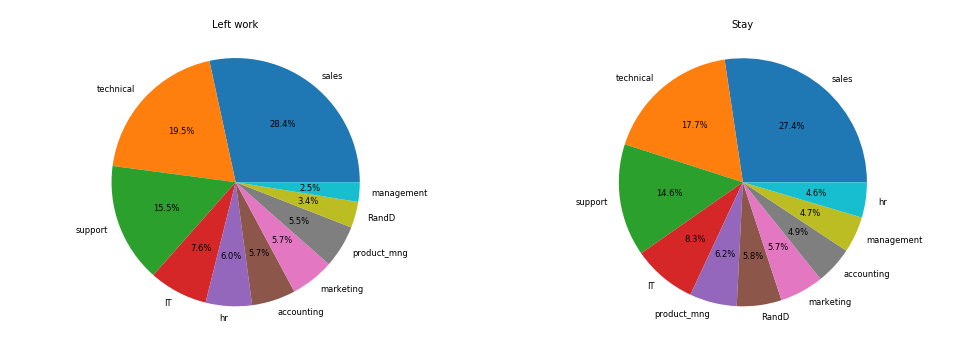

In [11]:
# Do the value counts of department counts
leftdepartmentcounts = leftdf['sales'].value_counts()
notleftdepartmentcounts = notleftdf['sales'].value_counts()

# plot each pie chart in a separate subplot
plt.subplot(221)
plt.pie(leftdepartmentcounts, labels=leftdepartmentcounts.index, autopct='%1.1f%%')
plt.title('Left work')
plt.axis('equal')

# plot each pie chart in a separate subplot
plt.subplot(222)
plt.pie(notleftdepartmentcounts, labels=notleftdepartmentcounts.index, autopct='%1.1f%%')
plt.title('Stay')
plt.axis('equal')


###**Profile of the people who left**

*   **Satisfaction_level** = People who left tends to had **low satisfaction_level**, but there is some people who very satisfied with their job and still left the job.
*   **last_evaluation** = High and low which might indicate over achiever and under achiever that leaves the companies. If this is true, that means employees left for two reasons: that they feel they could not channel their talents or motivation well or that they are motivated and apply for better career opportunities.
* **Number_project** = Most have 2 projects. Maybe unlike the distribution of the staying employees who have 3–4 projects. We might want to compare this further with the average_monthly_hours and viewed whether there is a Simpson Paradox ongoing where the insights changed as we consider other confound variables. We also need to compare further with the size and nature of the project.
* **average_monthly_hours** = It has either large or not so much average worked hours. This is unique as maybe the employees are getting too much or too less engaged within their company.
* **time_spend_company** = Some of them spend less time than the employees who stay, we might want to assume that they are less engaged with their workload. Combined with average_monthly_hours, this is a likely assumption.
* **Work_accident**  Does not have much work accidents
* **promotion_last_5years**  Lot less not promoted
* **sales** Does not differ much
* **salary** Most of them are at the lower level salary (low)

###Conclusion:
**A grouping of high paying and low paying jobs would need to be distinguished to give another view of the data (last evaluation --> High and Low, Number_project)**


**The features that matter in this exploratory -- why people leave: Last_evaluation, number_projects, and salary**


##Correlation Analysis

In [0]:
corr = leftdf.drop('left',axis=1).corr()

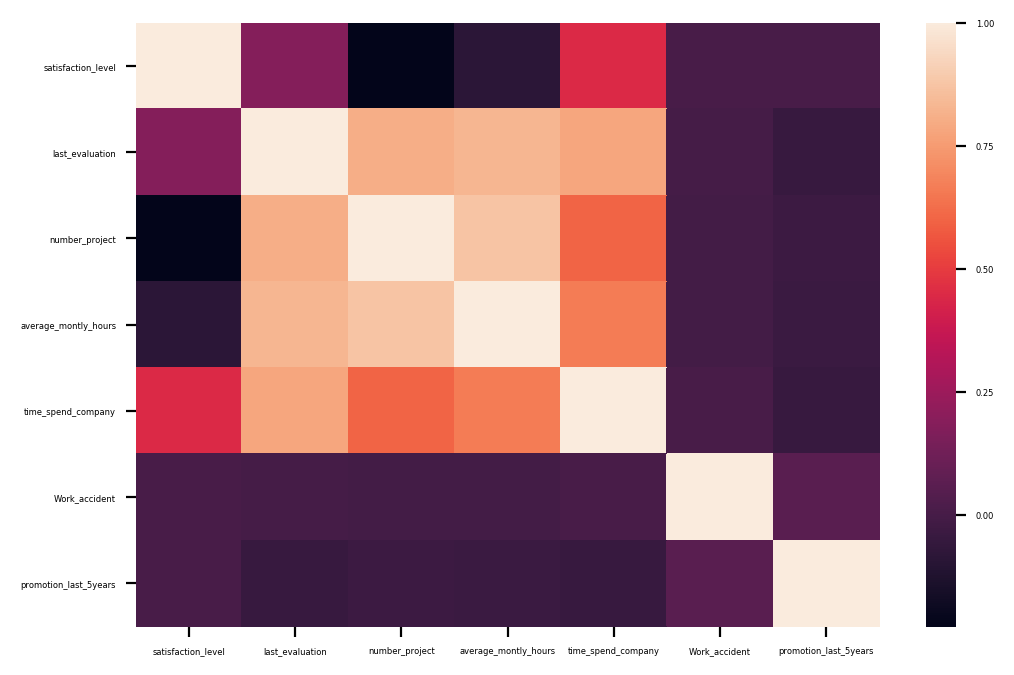

In [13]:
sns.heatmap(corr)

###**Correlation Analysis**

1.   number_project and average_monthly_hours: this makes sense as the more projects you have, the more time you should spend on it. This could be possibly the reason of dissatisfaction.
2.   last_evaluations and average_monthly_hours: This is somewhat a good and hopeful find, this shows that the longer the monthly hours, the more likely you get a good last evaluation. This is probably true in cultures such as Asia which still has micromanagement sometimes. We need to figure out further background information about the data to extract some hypothesis from this.



##Department Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


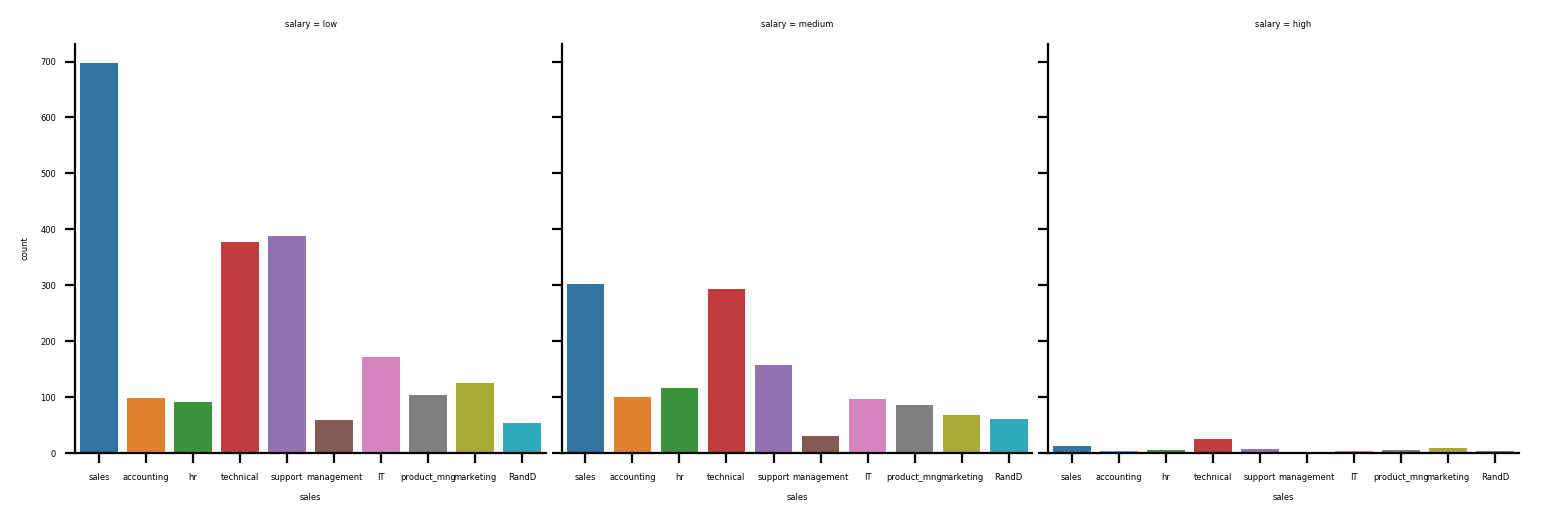

In [14]:
sns.factorplot(x="sales",data=leftdf,col="salary",kind='count',aspect=1,size=2.5)

###**Why sales leave the company a lot?**

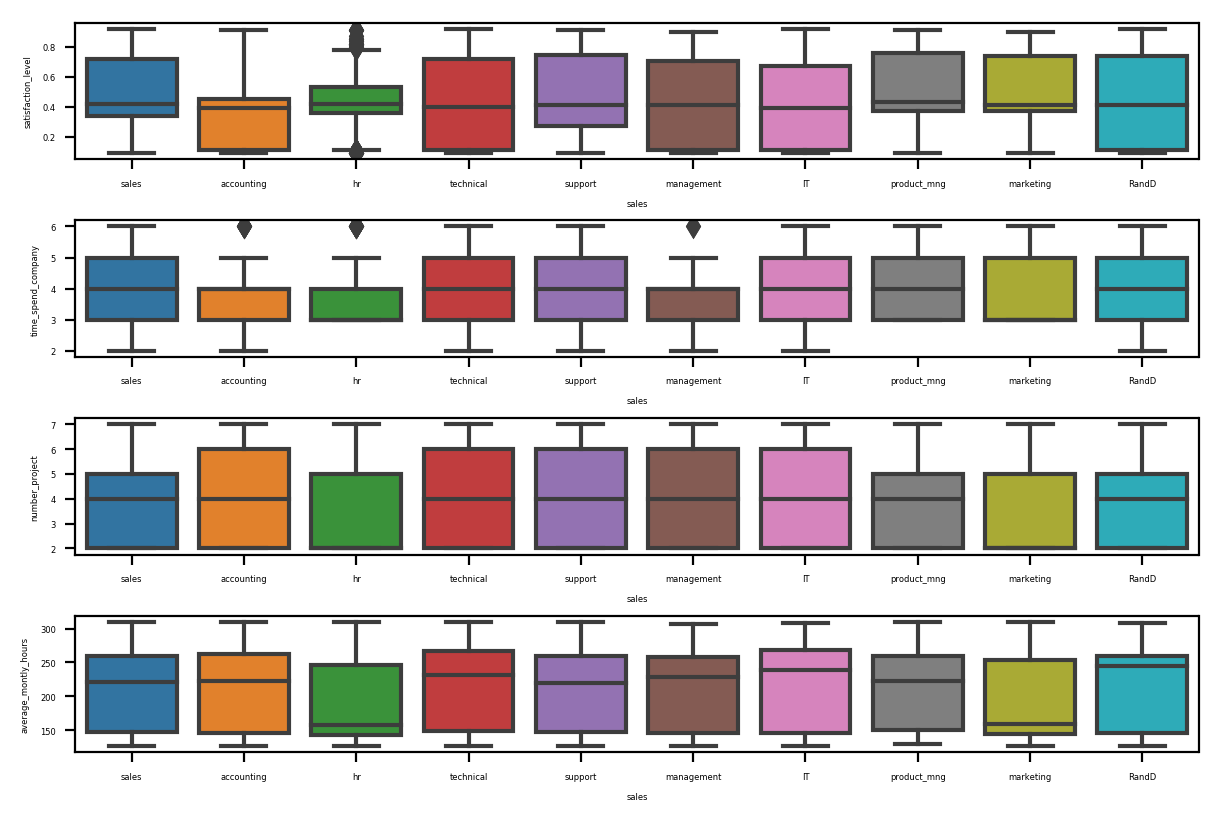

In [15]:
# plot each pie chart in a separate subplot
plt.subplot(411)
sns.boxplot(x='sales', y='satisfaction_level', data=leftdf)

# plot each pie chart in a separate subplot
plt.subplot(412)
sns.boxplot(x='sales', y='time_spend_company', data=leftdf)

# plot each pie chart in a separate subplot
plt.subplot(413)
sns.boxplot(x='sales', y='number_project', data=leftdf)

# plot each pie chart in a separate subplot
plt.subplot(414)
sns.boxplot(x='sales', y='average_montly_hours', data=leftdf)

plt.tight_layout()
plt.show()

**Analysis:**


1.   In terms of the comparisons with other departments whose employees left. Sales left no significant remarks why they left compared to other departments. In fact, we could see here that their surveyed satisfaction level is actually higher than accounting and other departments. This means that probably the only reason why sales left are because of low salary. Another reason is that they manipulated the survey answers probably due to fear of being found out by their sales managers. This could be a blackmailing material in case they do not meet the sales target.

2.   Accounting has one of the lowest satisfaction level with most of the quartiles located below 0.5. However, at the same time, accounting is one of the department where the rate of leaving is low.

3. Technical and support, on the other hand, gave a wide range from all features examined. Unlike sales, we could still see large number of employees who are not satisfied enough with their work. Thus, we need to isolate this further to know why some of them left. Probably, small companies and big companies will treat these employees differently. 

4. Marketing and product management have high satisfaction levels despite high rate of quitting in low salary. This might be because this industry moves really fast and some of the practitioners took better opportunities at multi national companies.

